<a href="https://colab.research.google.com/github/Shashankk15/22BDS0346_EDA/blob/main/22BDS0346.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BUDDA SHASHANK
## 22BDS0346
## EDA PROJECT

In [16]:
# 1. Install and Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)

In [20]:
# 2. Load Dataset
df = pd.read_csv("datasett.csv")


In [21]:
#3. Basic Exploration ---
print("Dataset Dimensions:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())

Dataset Dimensions: (240, 7)

Data Types:
 Temperature (K)             int64
Luminosity(L/Lo)           object
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                 object
Spectral Class             object
dtype: object

First 5 Rows:
    Temperature (K) Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068           0.0024        0.1700                   16.12   
1             3042           0.0005        0.1542                   16.60   
2             2600           0.0003        0.1020                   18.70   
3             2800           0.0002        0.1600                   16.65   
4             1939         0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        R

In [22]:
#4. Summary Statistics
print("\nSummary Statistics (Numeric):\n", df.describe())
print("\nSummary Statistics (All):\n", df.describe(include='all'))


Summary Statistics (Numeric):
        Temperature (K)  Radius(R/Ro)  Absolute magnitude(Mv)   Star type
count       240.000000    240.000000              240.000000  240.000000
mean      10497.462500    237.157781                4.382396    2.500000
std        9552.425037    517.155763               10.532512    1.711394
min        1939.000000      0.008400              -11.920000    0.000000
25%        3344.250000      0.102750               -6.232500    1.000000
50%        5776.000000      0.762500                8.313000    2.500000
75%       15055.500000     42.750000               13.697500    4.000000
max       40000.000000   1948.500000               20.060000    5.000000

Summary Statistics (All):
         Temperature (K) Luminosity(L/Lo)  Radius(R/Ro)  \
count        240.000000              240    240.000000   
unique              NaN              208           NaN   
top                 NaN           200000           NaN   
freq                NaN                5           

In [23]:
# 5. Missing Values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                3
Spectral Class            0
dtype: int64


In [24]:
# 6. Data Cleaning
# Convert Luminosity to numeric
df['Luminosity(L/Lo)'] = pd.to_numeric(df['Luminosity(L/Lo)'], errors='coerce')

In [25]:
# Handle missing 'Star color'
df['Star color'] = df['Star color'].fillna('Unknown')

In [26]:
# Standardize string columns
df['Star color'] = df['Star color'].str.strip().str.title()
df['Spectral Class'] = df['Spectral Class'].str.strip().str.upper()


In [27]:
print("\nCleaned Data Sample:\n", df.head())


Cleaned Data Sample:
    Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M  


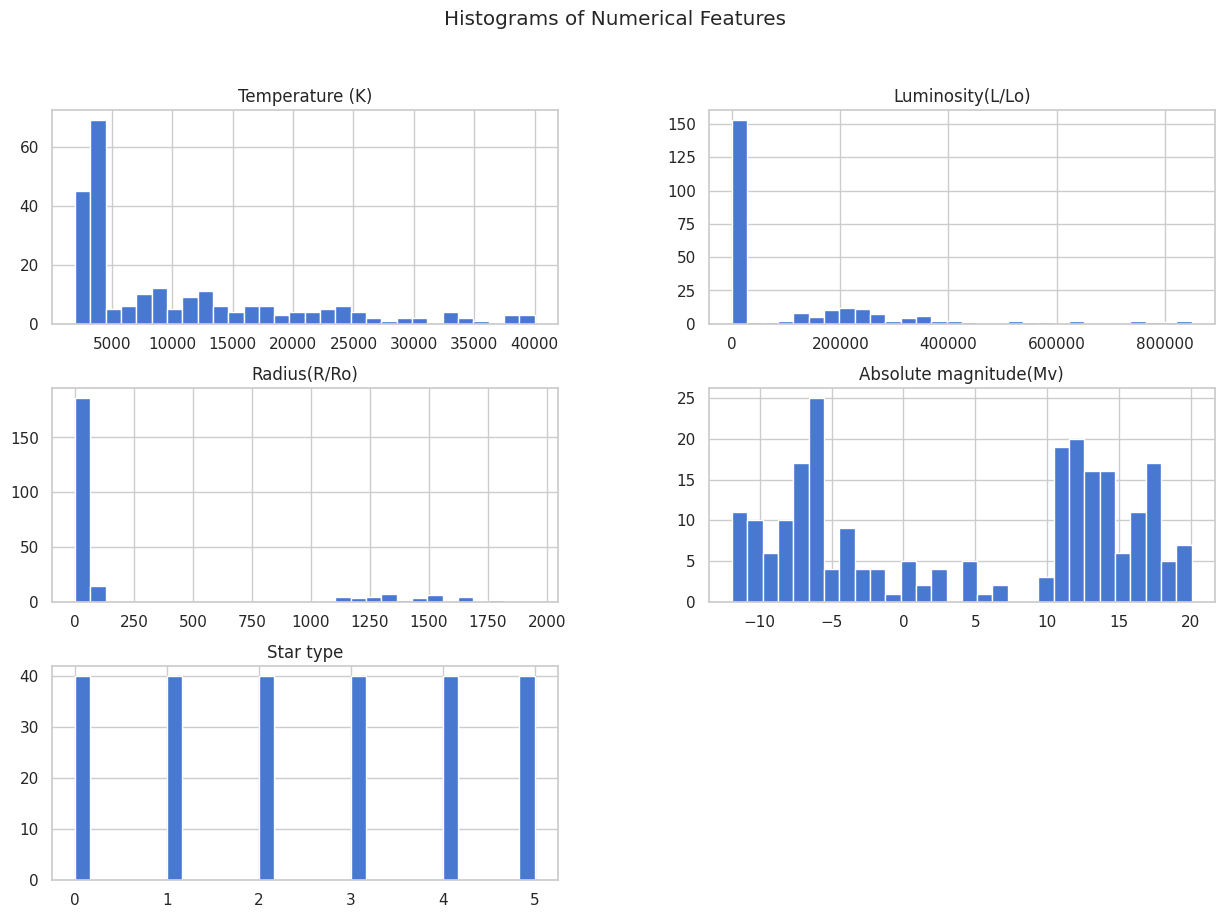

In [28]:
# 7. Univariate Analysis
# Histograms for numeric columns
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

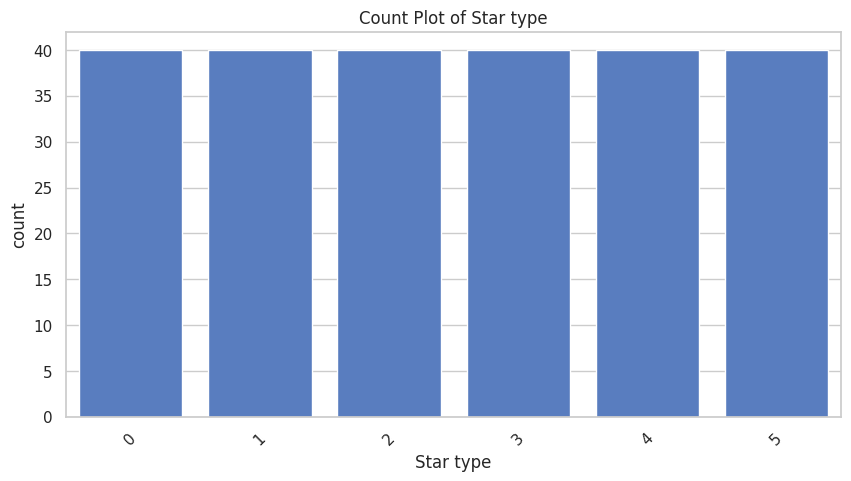

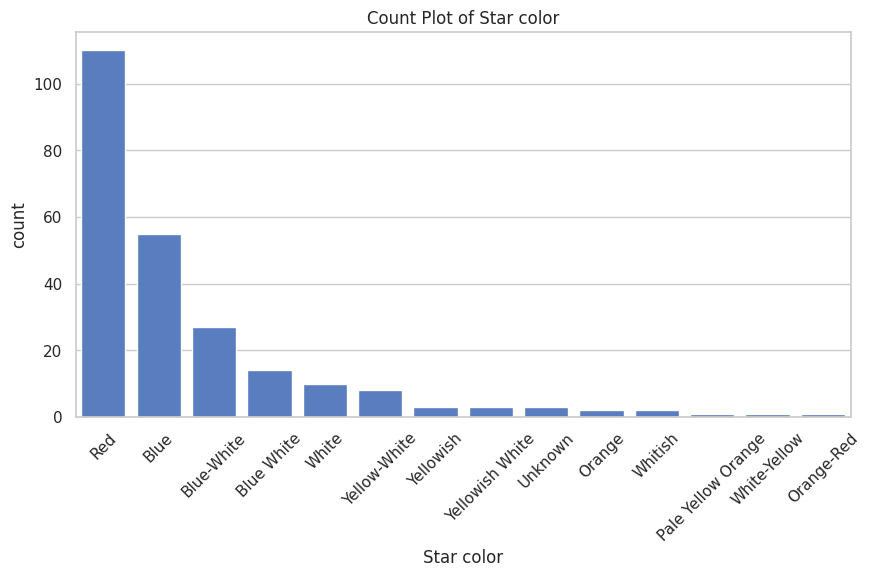

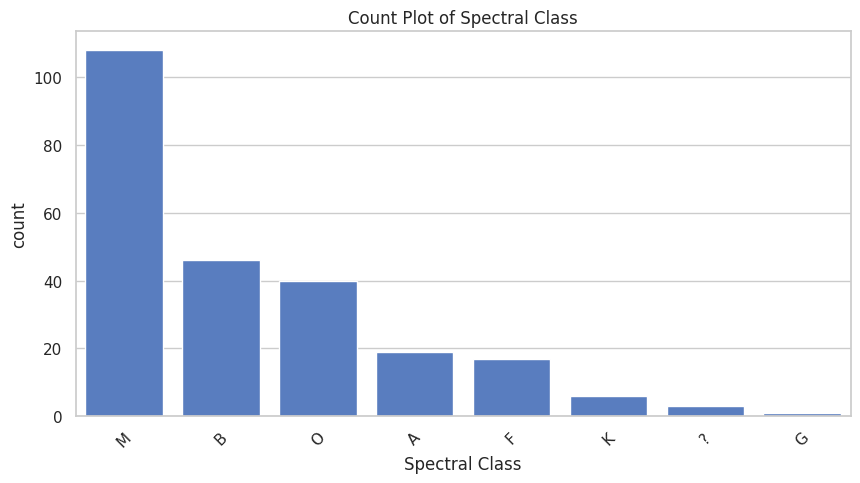

In [29]:
# Countplots for categorical columns
for col in ['Star type', 'Star color', 'Spectral Class']:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

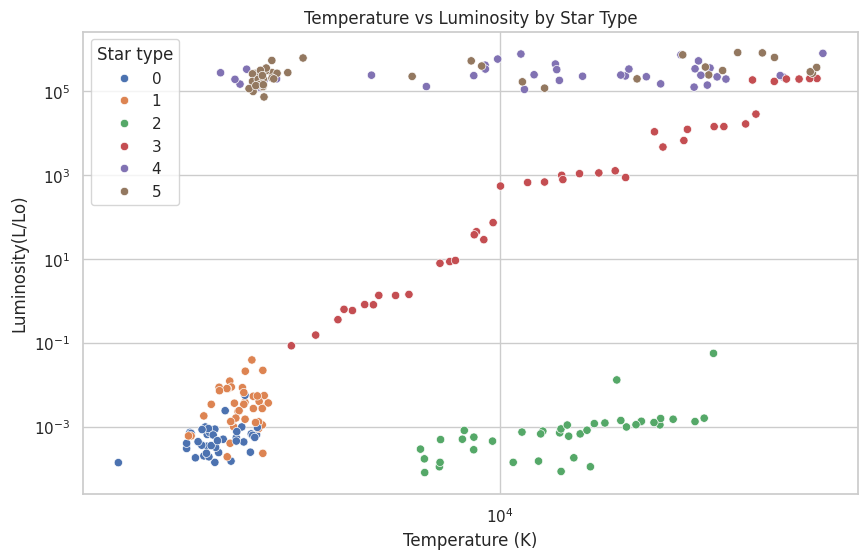

In [30]:
# 8. Bivariate Analysis
# Example: Temperature vs Luminosity
plt.figure()
sns.scatterplot(data=df, x='Temperature (K)', y='Luminosity(L/Lo)', hue='Star type', palette='deep')
plt.title("Temperature vs Luminosity by Star Type")
plt.xscale('log')
plt.yscale('log')
plt.show()

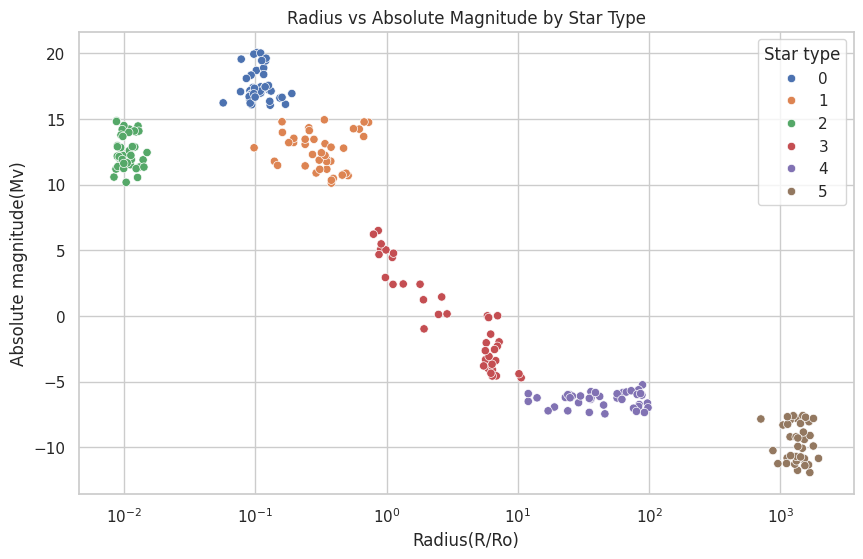

In [31]:
# Example: Radius vs Absolute Magnitude
plt.figure()
sns.scatterplot(data=df, x='Radius(R/Ro)', y='Absolute magnitude(Mv)', hue='Star type', palette='deep')
plt.title("Radius vs Absolute Magnitude by Star Type")
plt.xscale('log')
plt.show()

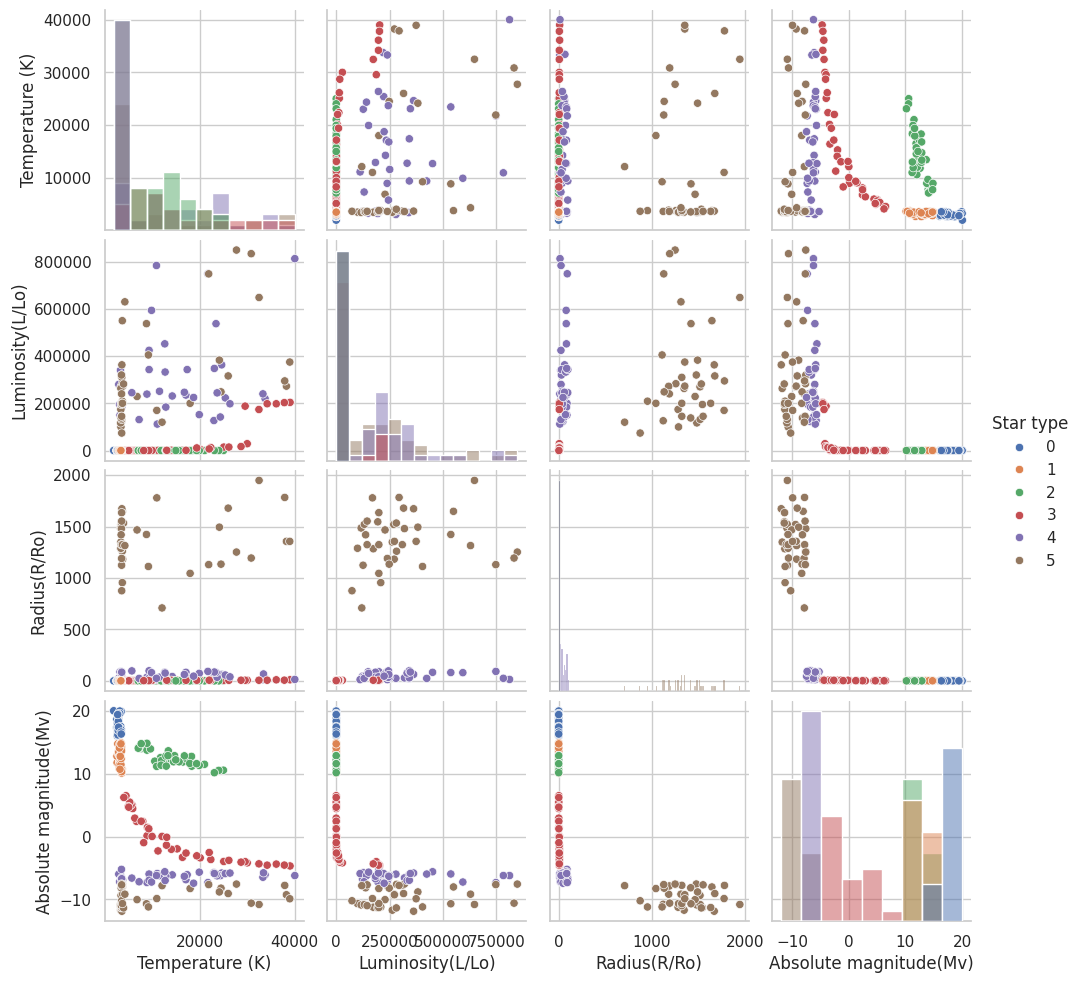

In [32]:
# 9. Multivariate Analysis
# Pairplot
sns.pairplot(df, vars=['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)'],
             hue='Star type', diag_kind='hist', palette='deep')
plt.show()

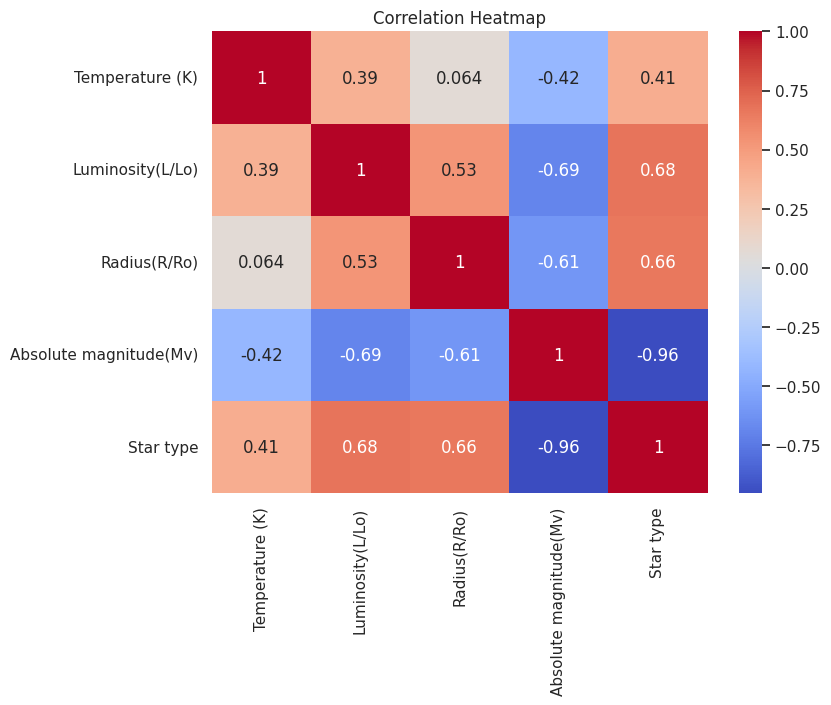

In [33]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## **EDA PHASE 2
## **22BDS0346
## **BUDDA SHASHANK


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [37]:
# Load dataset
df = pd.read_csv("datasett.csv")



In [38]:
# Convert Luminosity to numeric if needed
df["Luminosity(L/Lo)"] = pd.to_numeric(df["Luminosity(L/Lo)"], errors="coerce")


In [39]:
# 1D Analysis

print("\n--- 1D Analysis ---")

# Skewness
for col in ["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)"]:
    print(f"Skewness of {col}: {skew(df[col].dropna())}")


--- 1D Analysis ---
Skewness of Temperature (K): 1.3132941596030199
Skewness of Luminosity(L/Lo): 2.0815735942037996
Skewness of Radius(R/Ro): 1.9346117254577848
Skewness of Absolute magnitude(Mv): -0.1207786427322443


In [40]:
# Quantiles
print("\nQuantiles:")
print(df[["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)"]].quantile([0.25, 0.5, 0.75]))


Quantiles:
      Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)
0.25          3344.25           0.00086       0.10275                 -6.2325
0.50          5776.00           0.05600       0.76250                  8.3130
0.75         15055.50      198000.00000      42.75000                 13.6975


In [41]:
# Frequency distributions for categorical
print("\nCategorical Frequency:")
print(df["Star type"].value_counts())
print(df["Star color"].value_counts().head())
print(df["Spectral Class"].value_counts())


Categorical Frequency:
Star type
0    40
1    40
2    40
3    40
4    40
5    40
Name: count, dtype: int64
Star color
Red             110
Blue             54
Blue-white       26
Blue White       10
yellow-white      8
Name: count, dtype: int64
Spectral Class
M    108
B     46
O     40
A     19
F     17
K      6
?      3
G      1
Name: count, dtype: int64


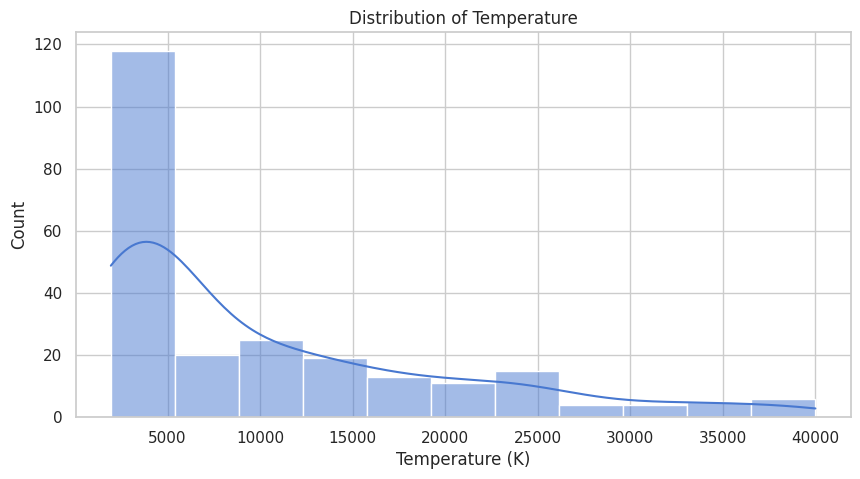

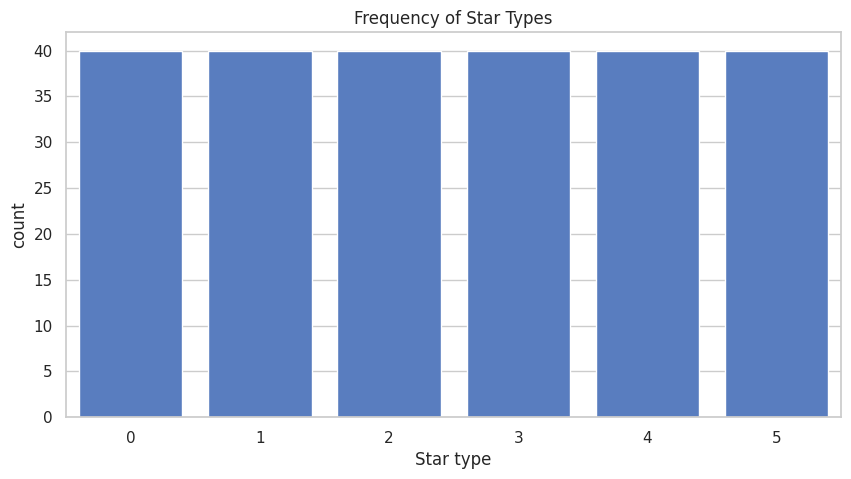

In [42]:
# 1D plots
plt.figure(figsize=(10,5))
sns.histplot(df["Temperature (K)"], kde=True)
plt.title("Distribution of Temperature")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x="Star type", data=df)
plt.title("Frequency of Star Types")
plt.show()


--- 2D Analysis ---


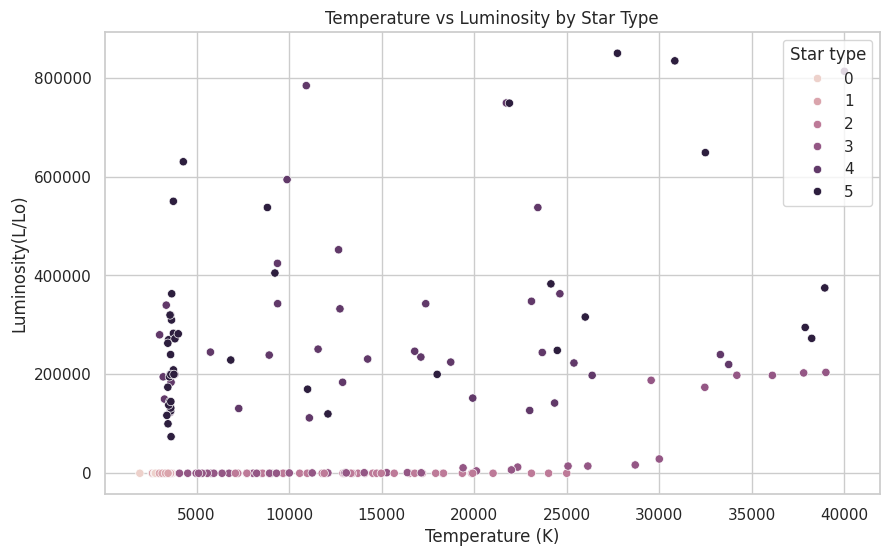

In [43]:

# 2D Analysis
print("\n--- 2D Analysis ---")

# Numerical vs Numerical
sns.scatterplot(x="Temperature (K)", y="Luminosity(L/Lo)", hue="Star type", data=df)
plt.title("Temperature vs Luminosity by Star Type")
plt.show()



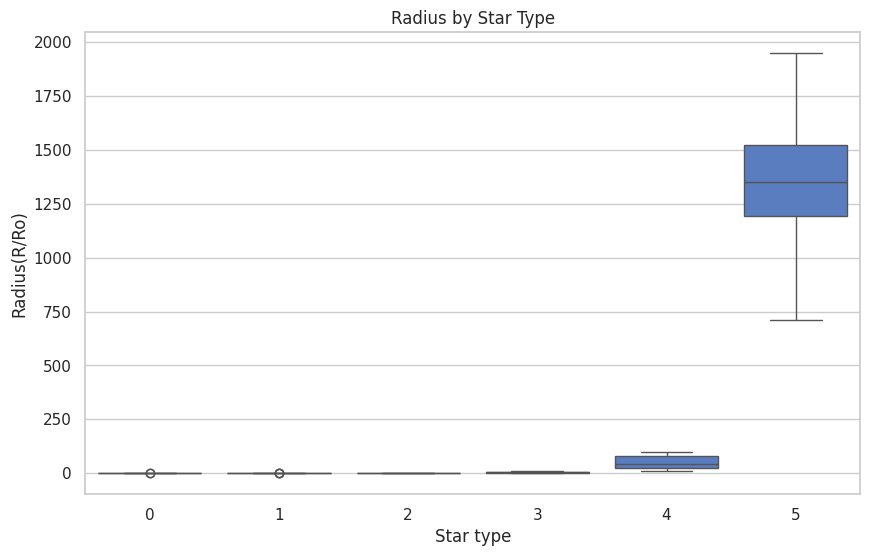

In [44]:
# Numerical vs Categorical
sns.boxplot(x="Star type", y="Radius(R/Ro)", data=df)
plt.title("Radius by Star Type")
plt.show()



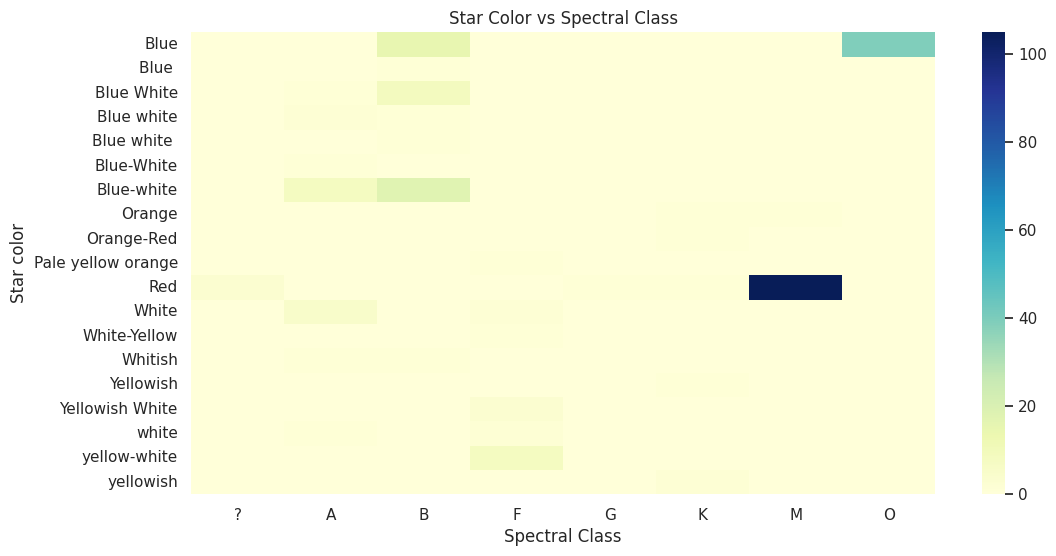

In [45]:
# Categorical vs Categorical
ct = pd.crosstab(df["Star color"], df["Spectral Class"])
plt.figure(figsize=(12,6))
sns.heatmap(ct, cmap="YlGnBu")
plt.title("Star Color vs Spectral Class")
plt.show()


--- 3D Analysis (Box Plots) ---


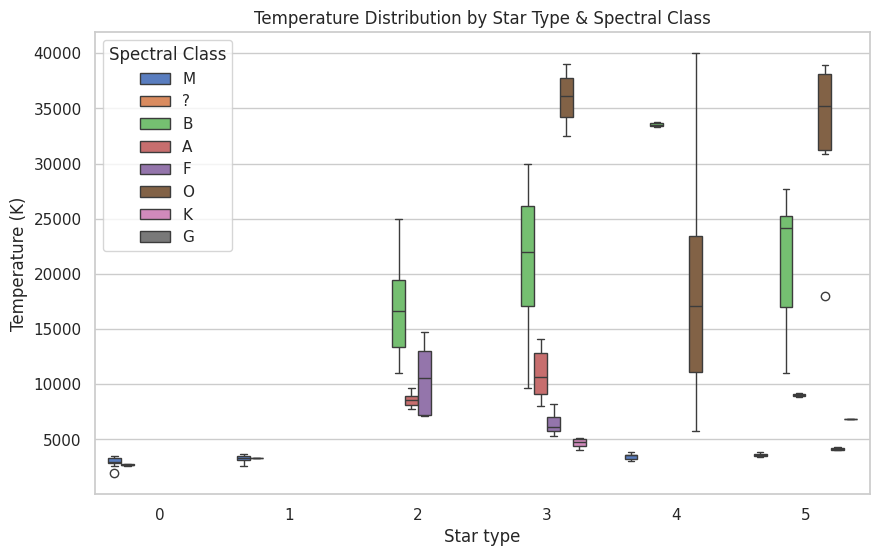

In [46]:

# 3D Analysis (Box Plots)
print("\n--- 3D Analysis (Box Plots) ---")

plt.figure(figsize=(10,6))
sns.boxplot(x="Star type", y="Temperature (K)", hue="Spectral Class", data=df)
plt.title("Temperature Distribution by Star Type & Spectral Class")
plt.show()

from sklearn.impute import SimpleImputer




In [47]:
# Module 5 - Clustering (KMeans)
print("\n--- Clustering (KMeans) ---")


--- Clustering (KMeans) ---


In [48]:
# Select numerical columns
X = df[["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)"]]

In [49]:
# Handle NaN values by imputing with median
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

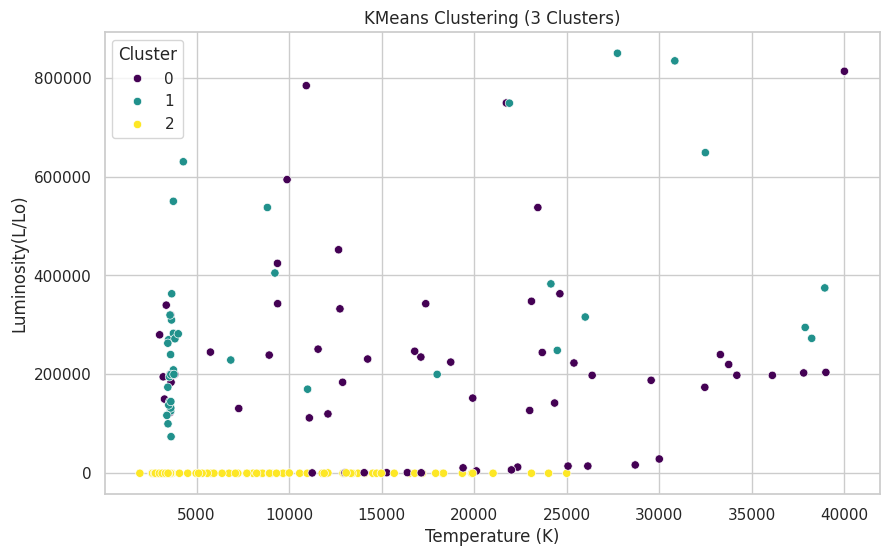

Cluster centers (scaled):
[[ 0.81811167  0.61280631 -0.36778171 -0.93424216]
 [ 0.0934104   1.16746171  2.22178267 -1.33990795]
 [-0.38248441 -0.59222994 -0.45867743  0.78032273]]


In [50]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Plot clustering result
plt.figure(figsize=(10,6))
sns.scatterplot(x="Temperature (K)", y="Luminosity(L/Lo)", hue="Cluster", palette="viridis", data=df)
plt.title("KMeans Clustering (3 Clusters)")
plt.show()

print("Cluster centers (scaled):")
print(kmeans.cluster_centers_)